# Lab 5: Probability and Distributions

### Learning goals

### Literature

* ROS Ch. 3 (Much of this should be review, so skimming is ok)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)





### Probability distributions

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=086916a2-df36-4157-94cc-aee700cfeba9&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

We'll start here by generating some fake data - here I just want to generate data that I can think of is some form of error. 

To be concrete, we could think about measurement error. We could imagine that a biologist is measuring the diameter of a tree. If they measure that diameter 1000 times they might record slightly different values every time because of completly random factors like their hand position or if the wind blows the tape measure a bit. We could write a simple model as: 

$$M = D + \epsilon$$

Here $M$ is the measurement, D is the actual diameter of the tree and $\epsilon$ is the error. $\epsilon$ is what we call a random variable. It is not represented by a single value, but a range of possible values which have a certain distribution. 

Let's try to picture this distribution. 

We use the np.random to generate from a uniform distribution and then matplotlib to plot


In [24]:
num = 1000

error = np.random.uniform(low=-1, high=1, size=num)

(array([114.,  97.,  87.,  83.,  95., 110., 100.,  96., 115., 103.]),
 array([-9.99524339e-01, -7.99690569e-01, -5.99856798e-01, -4.00023028e-01,
        -2.00189258e-01, -3.55487145e-04,  1.99478283e-01,  3.99312054e-01,
         5.99145824e-01,  7.98979594e-01,  9.98813365e-01]),
 <BarContainer object of 10 artists>)

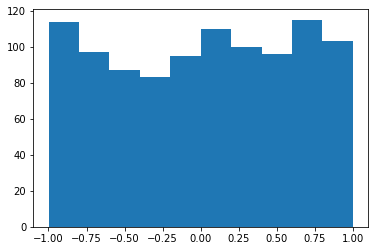

In [25]:
plt.hist(error)


Over the range we have specified (-1 to 1) this looks pretty uniform--hence the name uniform distribution!

Increase the number of observations (to 10,000, then 100,000) and see how the shape of the histogram changes.

Two ways we often describe a distribution (other than plotting the histogram) are the mean of the distribution and the variance/standard deviations

We can estimate the mean and standard deviation below:



In [26]:
#mean

mean_error = error.sum()/error.size

#or simply:

mean_error = error.mean()

#Variance

var_error= ((error-error.mean())**2).mean()

#or

var_error = error.var()

#standard deviation

std_error = np.sqrt(var_error)

#or 

std_error = error.std()

In [27]:
print("mean", mean_error)
print("var", var_error)
print("standard deviation", std_error)

mean 0.012602031010809426
var 0.34539779038602975
standard deviation 0.5877055303347329


### Simulation, playing god and statistics

Already here we are illustrating a basic, but sometimes difficult concept in statistics - the idea that we are trying to estimate some "true" underlying value by computing some statistic on a sample of data. 

By simulating our own data, as above, we get the advantage of playing god and actually "knowing" what the *true* values are that we are trying to estimate.  

So above, we have a "true" uniform distribution between the points a=-1 and b=1. 

By doing a little googling, we can find that the true mean (or expectation as we say in statistics-and which we often write as $\mu$) is: 

$$\mu = \frac{a+b}{2} = \frac{1--1}{2} = 0$$

And that the "true" variance (which we often write as $\sigma^2$ is

$$\sigma^2= \frac{(b-a)^2}{12} = \frac{(1--1)^2}{12} = \frac{1}{3}$$

The corresponding "true" standard deviation is:

$$\sigma = \sqrt(1/3) \approx 0.577$$

Compare these *true* values to the estimates we computed earlier - they are pretty good!

And if we increase the N - the number of draws from the distribution, to say 10,000 or 100,000, the estimates should get better and better. 

Of course, we usually don't have the luxury of knowing the "true" values - that is the whole point of doing a statistical analysis. That's why it is often useful to do these types of "fake data" simulations to quality controll our estimation.  

### Normal distribution - where it comes from

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=dfbee534-c76a-409c-9163-aee700cfd673&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

Below we are going to program in some random numbers in a few loops. 

* We will start by generating 100 values from a uniform distribution
* We will take a mean of that distribution and save it in an array
* We repeat this 1000 times, and then we will look at the distribution (histogram) of the mean values. 

What shape do you expect to see in the histogram?

In [29]:
n = 1000 #number of draws from a uniform distribution
m = 10000 #number of mean values of the 100 draws
meanValues = [] # initialize an empty array

for i in range(0,m): #create a for loop
    uniData = np.random.uniform(low=-1, high=1, size=n) #generate 100 random numbers from a uniform distribution
    meanValues.append(uniData.mean()) #take the mean of the generated data, then store than mean in MeanValues
    

<AxesSubplot:ylabel='Frequency'>

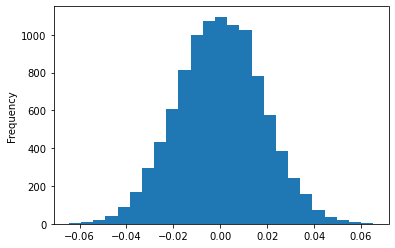

In [30]:
pd.Series(meanValues).plot.hist(bins=25)

What we get is a distribution with the typical bell curve shape - what we call the normal distribution or gaussian distribution. 

The simple simulation we did is a demonstration of one of the most powerful concepts in statistics- what we call the central limit theorem. Basically, if you take draws (say 100) from a random variable--from any distribution--take the mean or sum of those draws and then repeat many times, the distribution of those sums/means will be normal! This is pretty magic. 

We see normal distributions everywhere - especially in nature, but also social systems (like an economy). The reason is the Central Limit Theorem:

Any process that can be seen to be a summation or averaging of smaller steps will tend to be distributed normally. 

For example, lets consider heights among a class of university students in an applied statistics course. For each person, their height is the sum of small growth spurts--each day or each week say--according to some distribution. Summing up all these spurts gives you a students height. Looking at the distribution of these heights will then tend to be normally distributed. 

Because so many things in nature and society are normally distributed, we often times just assume something we are trying to measure or estimate is normally distributed - though this is not always the case, as we will see later in the course, and that can sometimes lead to problems.

### Simulating from a normal distribution

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=de7e9f2c-b1e4-4ecd-8cc7-aee700cfd671&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

We can easily simulate draws from a normal distribution directly

In [31]:
X = np.random.normal(10, 1, 1000)

In the above code we draw random numbers from a normal distribution which we describe as having true mean of equal to 10 and a standard deviation of 1. We draw 1000 numbers and put them in X. 

We could look at the first numbers, which lie close to 10, though in theory the tails of a normal distribution extend all the way to infinity. So in theory, we could get a number that is 100, but it would be very, very unlikely. 

We might want to view our draws as a histogram histogram - so we transform our array to a pandas Series, and use the built-in charting function:

<AxesSubplot:>

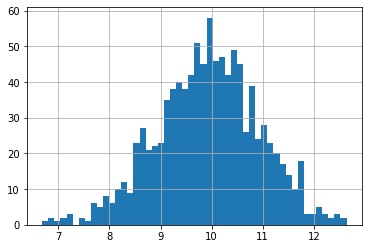

In [32]:
X = pd.Series(X)
X.hist(bins=50)

We can estimate the sample mean and sample standard distribution:

In [33]:
print(X.mean(), X.std())

9.933986035064258 0.995323569977079


Pretty close to our "true" values for the mean and standard deviation!

What happens if we increase the standard deviation to 4?

In [34]:
N = 1000
X2 =np.random.normal(10,4,N)

<AxesSubplot:>

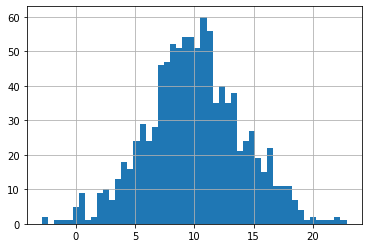

In [35]:
X2 = pd.Series(X2)
X2.hist(bins=50)

We see that the shape is similar, the distribution is centered around 10, but now there is more spread. And that is what the standard deviation is meant to measure - how much variation there is in the data around the mean.  

What percentage of the numbers in the above distribution lie within 1 standard deviation of the mean. Above, that would be the number of draws that lie between 6 and 14 (10 +/- our standard deviation,4). We can easily calculate that: 

In [36]:
X2[(X2>6) & (X2<14)].count()/1000

0.683

You should get something around 68%, and in fact this is generally true - about 68 percent of the numbers - what statisticians call "probability mass" falls within 1 standard deviation of the mean. What about 2 standard deviations?

In this example that would be +- 8, thus between 2 and 18. From above, we can already see that there are not many observations outside of this range in our sample, so perhaps here we should increase the number of observations in order to get a better estimate. 

In [37]:
N = 10000
X2 =np.random.normal(10,4,N)

<AxesSubplot:>

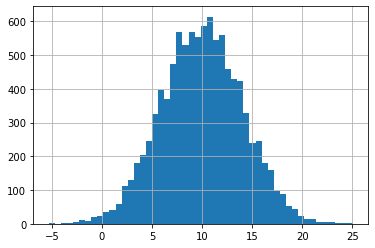

In [38]:
X2 = pd.Series(X2)
X2.hist(bins=50)

In [39]:
X2[(X2>2) & (X2<18)].count()/N

0.9564

Turns out that about 95% of the numbers ("probability mass") are between +/- 2 standard deviations of the mean. Again, this is generally true of normal distributions. The converse of course is that about 5% of the numbers lie outside this range. 

#### Linear transformation of normal distributions.

Let us say we now have a distribution of Female heights and a distribution of Male heights:

<AxesSubplot:>

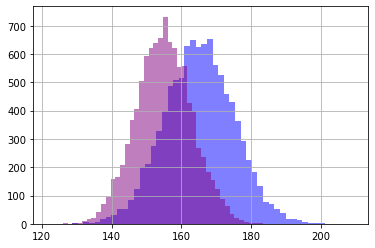

In [110]:
XY = pd.Series(np.random.normal(165,10,10000))
XX = pd.Series(np.random.normal(155,8, 10000))

fig, ax = plt.subplots()
XY.hist(ax=ax, color="Blue", alpha=.5, bins=50)
XX.hist(ax=ax, color="Purple", alpha=.5, bins=50)



Here we draw from normal distributions where the height of men is on average 165cm with a standard deviation of 10 and the height of females is 155 with a standard deviation of around 8. (These are made up, but they seemed reasonable). 

If you don't understand why we use the names XY and XX, you need to go check out a biology textbook and look up chromosomes. 

What is the distribution of the difference between male and female heights?

Mean: 10.090006359997435 Std. Dev: 12.634029955688597


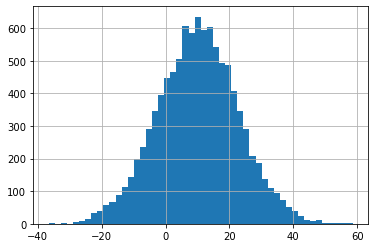

In [111]:
D = XY-XX
D.hist(bins=50)
print("Mean:", D.mean(), "Std. Dev:", D.std())

A few things to notice. 

1. The difference of two normal distributions is also normal. This is generally true - any linear transformation of one or multiple normal distributions will be normal. 

2. Not suprisingly, the mean of the difference is the difference in the means of the distributions (165-155=10). Our sample difference mean is pretty close. 

3. When adding or subtracting two normal distributions with standard deviations $\sigma_{XX}$ and $\sigma_{XY}$ then we can use the formula:

$$\sigma_D = \sqrt{\sigma_{XY} + \sigma_{XX}}$$

So we can caluclate the "true" standard deviation of our difference in height:

In [218]:
np.sqrt(10**2 + 8**2)

12.806248474865697

Again, pretty close to our "sample" value. Notice that in the book (ROS p.42) they do a slightly different calculation. Here they take the difference in means and ask what the standard deviation would be of the **distribution of the means**. In assignment 1 below, you are asked to simulate and estimate this scenario. 

## Correlated random variables

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=57f7ec62-125f-48c0-96e1-aee700cfd66c&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

In [48]:
X = pd.Series(np.random.normal(10,4,10000))
Y = pd.Series(2+.2*X + np.random.normal(0,2,10000))

In [49]:
print(X.mean(), Y.mean())
print(X.std(), Y.std())

10.080092065167234 4.0124398268964425
3.938844293851789 2.135951324016195


Here X is a sample from a normal distribution with mean 10 and standard deviation 4. We draw 1000 observations

Y is a linear combination of constant (5), .2*X, plus an added error term with 0 mean and standard deviation of 2. Since it is a linear combination of normal distribution, Y should also be normally distributed. 

Let's plot these two as a scatter plot so that we can see the correlation and as histograms: 

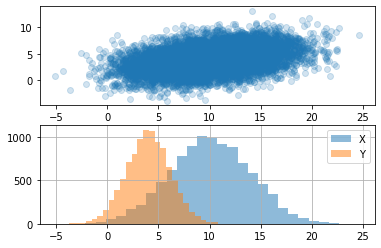

In [50]:
fix, ax = plt.subplots(2)
ax[0].scatter(X,Y, alpha=.2)
X.hist(bins=30, ax=ax[1], alpha=.5, label="X")
Y.hist(bins=30, ax=ax[1], alpha=.5, label="Y")
plt.legend()

We can calculate the sample correlation of these random variables using the formula for correlation coefficient:

$$\rho_{XY} = \frac{E((X-\mu_X)(Y-\mu_Y))}{\sigma_X*\sigma_Y}$$

In [51]:
corr = np.mean((X-X.mean())*(Y-Y.mean()))/(X.std()*Y.std())

print(corr)



0.3789129536203976


Or more easily (this function returns a matrix of values in cases where you want to investigate correlation coefficients across multiple variables)

In [52]:
np.corrcoef(X, Y)

array([[1.        , 0.37895085],
       [0.37895085, 1.        ]])

We should get something close to .37

But wait! In creating Y, we used the .2 as the coefficient on the X random variable. Why is the correlation coefficient .37?

The reason is that the relative standard deviations of the two random variables will also determine the correlation coefficient (as you can see in the formula above). 

Try generating the values for X and Y about but with the same standard deviations. 

#### Adding two correlated random variables

Now let's investigate what happens when we add these two correlated random variables

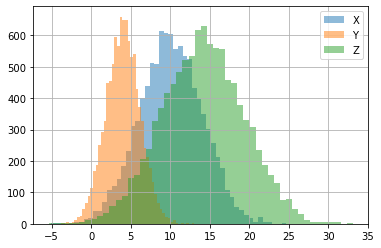

In [53]:
Z=X+Y

fix, ax = plt.subplots(1)
X.hist(bins=50, ax=ax, alpha=.5, label="X")
Y.hist(bins=50, ax=ax, alpha=.5, label="Y")
Z.hist(bins=50, ax=ax, alpha=.5, label="Z")


plt.legend()

Now let's take the sample mean and standard deviation

In [47]:
print(Z.mean(), Z.std())

14.008501544366839 5.232848315894954


We can probably see already that the mean of the summed variable will just be $\mu_Z = \mu_X + \mu_Y = 10+4=14$

The formula for the true standard deviation is a bit more complicated: $\sigma_z = \sqrt{\sigma_X^2 + \sigma_Y^2 + 2 \rho \sigma_X \sigma_Y}$

When we calculate that out:

In [54]:
np.sqrt(4**2 + 2**2 + 2*.37*4*2)

5.091168824543142

Out sample standard deviation should be pretty close

### Other distributions

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=b4e3f235-3487-4caf-87e6-aee700cfd66f&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

#### Heads or tails: Binomial distribution

Lots of things in life are binary: Pass or fail, accepted or not accepted, promoted or not promoted, score or not score and so on. We might like a distribution that describes a set of (independent) such events. That is what the **binomial distribution** is. 

The inputs to a binomial distribution are a probability of success, *p*, and a number of trials or attempts or shots or lottery tickets or whatever, *n*. 

The output, in a way is a draw of the number of successes. 

So let's say we are modelling the number of people who pass a tough on-road driving test the first time in a given day, which historically has had a pass rate of about 30%.

We consider each trial to be independent and we assume that about 100 people take the test per day.

We look at 10 days of data

In [71]:
n=100
p=.3
size=10


numPass = pd.Series(np.random.binomial(n,p, size))
numPass

0       30
1       32
2       38
3       25
4       29
        ..
9995    25
9996    31
9997    31
9998    36
9999    41
Length: 10000, dtype: int64

So above, with a success probability of around $p=.3$ and 100 days, we got a number of sucesses that tend to land around 30. We can calculate our sample mean and standard deviation:

In [72]:
print(numPass.mean(), numPass.std())

30.0608 4.570119468809946


The "true mean" for a binomial distribution is $n*p = 100*.3=30$. So our sample mean was not too far off. 

The standard deviation is $\sqrt{np(1-p)}$:

In [73]:
np.sqrt(n*p*(1-p))

4.58257569495584

Again, the "true" standard deviation is not to far the same standard deviation. 

Below is a histogram of our distribution. Now, change the simulation about so that we get a size of 1000, and then 10.000. What happens to the histogram below?

<AxesSubplot:>

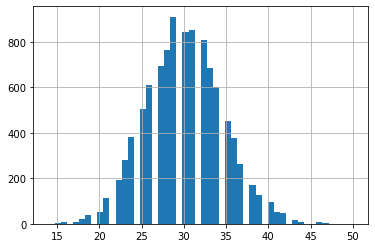

In [75]:
numPass.hist(bins=50)

The larger the sample you get, the more it should begin to look like a normal distribution. And in fact, as the sample size gets larger and larger, the normal distribution becomes an increasingly good approximation for the binomial distribution. 

#### Count data and poisson distribution

Let's say I am a manager at a large fast-food restaurant. I want to get an idea of how many people I need working and would like to see a distribution of the number of customers that might be expected to arrive per hour. Historically, there has been average of 5 customers per hour. 

This type of count data can often be modelled with what is called a poisson distribution. All you need is an expected rate (in this case 5 per hour):

In [76]:
custPerHour = pd.Series(np.random.poisson(5,10000))

<AxesSubplot:>

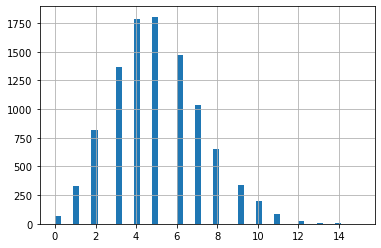

In [77]:
custPerHour.hist(bins=50)

Poisson distributions must be positive, so normal distributions are poor proxies since they can go negative. Above we can see that we have some longer positive tail ("positive skew"), which indicates the possibility for a few times where you will get many customers. We can calculate the mean (expectation) and variance (I will explain why:

In [295]:
print(custPerHour.mean(), custPerHour.var())

5.0164 4.9978308230824915


Both the sample mean (expectation) and sample variance are pretty close to the "true" mean (5). In fact, this is generally true of the poisson distribution: the variance is the same as the mean. 

This makes things easy in some ways, but it is often a limitation and in real life, count data often have more variance (or "dispersion" as it is sometimes called) than a poisson distribution indicates. Therefor, modelling of count data often makes use of "over-disersed" poisson models that allow for specifying larger variances.

# Assignment

## 1 Distribution of difference of means

ROS (p42) take a sample from two normal distributions (heights of mean and woman) and then calculate a mean value. Then they ask what the standard deviation is of the *mean* value. 

Simulate an answer to this question: 

- Create a for loop with 1000 loops. 

- Within each loop, draw two normal samples, XX and XY. XX is the height of females and has a mean of 63.7 and a standard deviation of 2.7. XY is the height of males has has a mean of 69.1 and a standard deviation of 2.9. 

- For both the male and female samples, take the mean value for height for each, then calculate the mean difference. Store this value in a list or array. 

- Now calculate the mean and standard deviation of the 1000 values you have calculated. Is it close to the "true" value as calculated in the book?

## 2. Binomial distribution and normal distribution

* Generate a series from a binomial distribution, again with a p=.3, but now with n=1000. Generate 10,000 samples and store in an array.
* Generate a series from a normal distribution where the mean and std. deviation are calculated according to the formulas for the binomial distribution ($mean=np$, $std=\sqrt{np(1-p)}$) and numbers above (n=1000, p=.3)
* Plot both histograms on the same axis (perhaps with alpha=.5 to make transparent. When n is large, does it look like the normal distribution is a good proxy for the binomial distribution?

## 3. Distributions and real data

Load in the data from Penn World tables introduced in lab 2. 

* Create a variable for real GDP (expenditure) per capita. Take a histogram of the data for a certain year.

* Does it look roughly normal?

* Take a log-transformation of the rgdp series. Plot a histogram of the transformed series. If rgdpe was normal, then the log transformed variable should have a log-normal distribution. (Log transformations are often done on all-positive series to make geometric relationships linear. So let's say that the relationship between GDP and the human capital index can be written: $GDP = ae^{bHC}$. Taking the log of both sides, we get $log(GDP) = log(a) + bHC$)

* Calculate the correlation coefficient between real GDP per capital (expenditure) and the Human capital index for the year 2019

* Calculate the correlation coefficient between real GDP for every year there is available data (use groupby and then iterate throught he data frame). Does the correlation coefficient seem to change much over the years? Can you speculate on the reason for the pattern?

## 4. Distribution of electricity prices

Load data for electricity prices (found in lab 3) in Norway (Oslo prices). 

* Plot a histogram of the data. Does it look normal? 

* Let's say you assume electricity prices are normal. Take the mean and standard deviation of the prices. Using the assumption of normality, calculate what percentage of the time you would expect prices to be above 100 EURO/MWH

* What does this exercise tell you about the danger of incorrectly assuming a normal distribution when calculating risks?